In [1]:
#This imports the relevant dependencies
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns
import numpy as np

In [2]:
#This brings in the top 100 employers list
filename = "resources/employers_clean.csv"
employers_df=pd.read_csv(filename)
employers_df

,RANK,NAME,TICKER,INDUSTRIES,Country,EMPLOYEES,Glassdoor Rating,City,mergent_name,mergent_ticker,mergent_compnumber,mergent_mic
0,1,Samsung Electronics,005930.KS,"Semiconductors, Electronics, Electrical Engine...",South Kore,"266,673",3.8,Suwon,Samsung Electronics Co Ltd,SSNN F,74454.0,6.2.4
1,2,Microsoft,MSFT,"IT, Internet, Software & Services",United States,"221,000",4.4,Redmond,Microsoft Corporation,MSFT,46247.0,6.3.2
2,3,IBM,IBM,"Semiconductors, Electronics, Electrical Engine...",United States,"250,000",4.2,Armonk,International Business Machines Corp.,IBM,4427.0,6.3.1
3,4,Alphabet,GOOG,"IT, Internet, Software & Services",United States,"156,500",4.5,Mountain View,Alphabet Inc,GOOG L,109717.0,2.3.2
4,5,Apple,AAPL,"Semiconductors, Electronics, Electrical Engine...",United States,"154,000",4.1,Cupertino,Apple Inc,AAPL,12161.0,6.2.1
...,...,...,...,...,...,...,...,...,...,...,...,...
95,96,Mastercard,MA,Banking and Financial Services,United States,"24,000",4.3,Purchase,Mastercard Inc,MA,113838.0,7.5.2
96,97,Electricite de France,EDF.PA,Utilities,France,"167,157",4.0,Paris,Electricite de France,ECIF Y,14498.0,3.1.1
97,98,Verbund,VER.VI,Utilities,Austria,"3,184",4.7,Vienna,Verbund AG,OEZV Y,40705.0,3.1.1
98,99,Panasonic,6572.T,"Engineering, Manufacturing",Japan,"240,198",3.8,Kadoma,Panasonic Holdings Corp,PCRF Y,5299.0,1.5.1


In [3]:
employers_df=employers_df[['RANK','NAME','Country']]
employers_df=employers_df.replace('South Kore','South Korea')

In [4]:
employers_df['Country'].value_counts()


United States           40
Germany                 17
France                   8
Italy                    6
Japan                    5
South Korea              4
China                    4
Switzerland              3
Netherlands              3
United Kingdom           2
Canada                   2
India                    1
Saudi Arabia             1
Sweden                   1
Singapore                1
Austria                  1
United Arab Emirates     1
Name: Country, dtype: int64

In [5]:
union_density=pd.read_csv("resources/union_density.csv")
union_density.drop([0],inplace=True)
union_density=union_density.rename(columns={'Unnamed: 0':'Country','Unnamed: 1':'Year'})
union_density=union_density.replace('Korea, Republic of','South Korea')

In [6]:
union_density

,Country,Year,Trade union density rate (%)
1,Austria,2017,26.65
2,Canada,2017,28.44
3,China,2017,44.25
4,France,2017,9
5,Germany,2017,16.68
6,India,2017,19.8
7,Italy,2017,33.23
8,Japan,2017,17.15
9,South Korea,2017,12.44
10,Netherlands,2017,16.8


In [7]:
country_group=employers_df.groupby('Country')
country_group=country_group.count()

emp_unions=pd.merge(country_group,union_density,on='Country',how='inner')
emp_unions

,Country,RANK,NAME,Year,Trade union density rate (%)
0,Austria,1,1,2017,26.65
1,Canada,2,2,2017,28.44
2,China,4,4,2017,44.25
3,France,8,8,2017,9
4,Germany,17,17,2017,16.68
5,India,1,1,2017,19.8
6,Italy,6,6,2017,33.23
7,Japan,5,5,2017,17.15
8,Netherlands,3,3,2017,16.8
9,Singapore,1,1,2017,22.16


In [8]:
emp_unions=emp_unions.sort_values(by='RANK',ascending=False)
emp_unions.set_index('Country')

,RANK,NAME,Year,Trade union density rate (%)
Country,,,,
United States,40,40,2017,10.31
Germany,17,17,2017,16.68
France,8,8,2017,9
Italy,6,6,2017,33.23
Japan,5,5,2017,17.15
China,4,4,2017,44.25
South Korea,4,4,2017,12.44
Netherlands,3,3,2017,16.8
Switzerland,3,3,2017,14.86


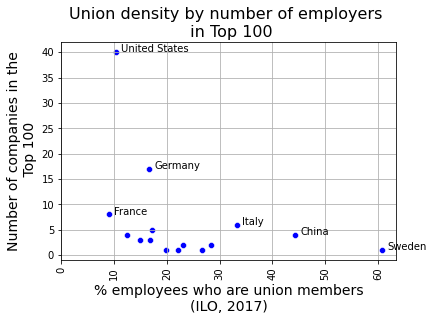

<Figure size 432x288 with 0 Axes>

In [16]:
counts=emp_unions['RANK']
trade_density=emp_unions['Trade union density rate (%)']
text=emp_unions['Country']
customlist=[2,3,4,6,11,14]
xaxis=np.arange(0,65,10)

df=pd.DataFrame({'Country':text,'Counts':counts,'Union':trade_density})

df

df['Union']=df['Union'].astype(float)

sns.scatterplot(data=df,x='Union',y='Counts',marker='o',color='blue')
plt.xticks(xaxis,rotation=90)
plt.xlabel("% employees who are union members\n(ILO, 2017)", size=14)
plt.ylabel("Number of companies in the\n Top 100",size=14)
plt.title("Union density by number of employers \n in Top 100",size=16)

for line in (customlist):
    plt.text(df.Union[line]+1,df.Counts[line],df.Country[line],horizontalalignment='left',size='medium',color='black',)

plt.grid()
plt.show()

plt.savefig('Images/unions_employers.png')

In [10]:
hours_worked=pd.read_csv('resources/hours_worked.csv')
hours_worked

,Country,Hours Worked
0,Austria,1442.453757
1,Canada,1684.998400
2,France,1490.331744
3,Germany,1349.300000
4,Italy,1668.500000
5,Japan,1607.000000
6,South Korea,1915.000000
7,Netherlands,1416.542666
8,Sweden,1444.285085
9,United Kingdom,1497.375463


In [11]:
emp_hours=pd.merge(emp_unions,hours_worked,on='Country',how='inner')
emp_hours

,Country,RANK,NAME,Year,Trade union density rate (%),Hours Worked
0,United States,40,40,2017,10.31,1791.000000
1,Germany,17,17,2017,16.68,1349.300000
2,France,8,8,2017,9,1490.331744
3,Italy,6,6,2017,33.23,1668.500000
4,Japan,5,5,2017,17.15,1607.000000
5,South Korea,4,4,2017,12.44,1915.000000
6,Netherlands,3,3,2017,16.8,1416.542666
7,Canada,2,2,2017,28.44,1684.998400
8,United Kingdom,2,2,2017,23.14,1497.375463
9,Austria,1,1,2017,26.65,1442.453757


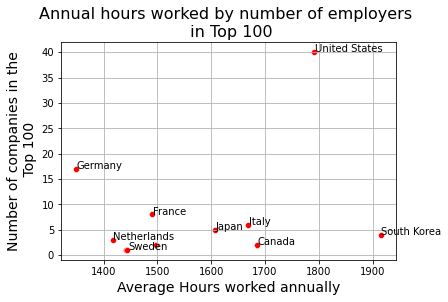

<Figure size 432x288 with 0 Axes>

In [15]:
counts=emp_hours['RANK']
hours=emp_hours['Hours Worked']
text=emp_hours['Country']
customlist=[0,1,2,3,4,5,6,7,10]
xaxis=np.arange(1200,100,1800)

df2=pd.DataFrame({'Country':text,'Counts':counts,'Hours':hours})

df2['Hours']=df2['Hours'].astype(float)

sns.scatterplot(data=df2,x='Hours',y='Counts',marker='o',color='red')

plt.xlabel("Average Hours worked annually", size=14)
plt.ylabel("Number of companies in the\n Top 100",size=14)
plt.title("Annual hours worked by number of employers \n in Top 100",size=16)

for line in customlist:
    plt.text(df2.Hours[line]+1,df2.Counts[line],df2.Country[line],horizontalalignment='left',size='medium',color='black',)

plt.grid()
plt.show()

plt.savefig('Images/hours_employers.png')